# Fake News Detection

## Importing the libraries

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re 


## Importing the dataset

In [49]:
true_df=pd.read_csv("data/True.csv")
fake_df=pd.read_csv("data/fake.csv")

## Modify the Dataset 

In [25]:
#Checking the columns
print(true_df.columns)
print(fake_df.columns)


Index(['title', 'text', 'subject', 'date'], dtype='object')
Index(['title', 'text', 'subject', 'date'], dtype='object')


In [26]:
#ADD True/False column to the dataframes
true_df['True/Fake']=1
fake_df['True/Fake']=0




In [27]:
#Dropping the irrelevant columns
true_df.drop(['text','subject','date'],axis=1, inplace=True)
fake_df.drop(['text','subject','date'],axis=1, inplace=True)
print(true_df.columns)
print(fake_df.columns)

Index(['title', 'True/Fake'], dtype='object')
Index(['title', 'True/Fake'], dtype='object')


## Merge and Shuffle the datasets

In [28]:
#Merge
dataset=pd.concat([true_df,fake_df],axis=0,ignore_index=True)


In [29]:
dataset.head()

,title,True/Fake
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [30]:
dataset.tail()

,title,True/Fake
44893,McPain: John McCain Furious That Iran Treated ...,0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
44896,How to Blow $700 Million: Al Jazeera America F...,0
44897,10 U.S. Navy Sailors Held by Iranian Military ...,0


In [31]:
#Shuffling the dataset
dataset=dataset.sample(frac=1,random_state=69).reset_index(drop=True)


In [32]:
dataset.head()

,title,True/Fake
0,Downfall of ex-Samsung strategy chief leaves '...,1
1,"Attorney General Sessions visits White House, ...",1
2,Trump Has Finally Commented On Portland Train...,0
3,Lawmaker says U.S. foreign surveillance 'unmas...,1
4,SHOCKING POLL RESULTS In Primary Victories Ton...,0


In [33]:
dataset.tail()

,title,True/Fake
44893,REFUGEE BUSINESS IS CASH COW FOR LUTHERAN CHAR...,0
44894,Turkey's Erdogan defends Ottoman commander aft...,1
44895,BREAKING: Dems Celebrate Progressive Win As D...,0
44896,"Trump bashes Clinton, promises not to become b...",1
44897,Democrats want Congress' authorization for ant...,1


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      44898 non-null  object
 1   True/Fake  44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


## Cleaning the texts

In [35]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import re

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
corpus = []

for i in range(0, len(dataset)):
    title = re.sub('[^a-zA-Z]', ' ', dataset['title'][i])
    title = title.lower()
    title = title.split()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')  # Keep "not" if needed
    title = [lemmatizer.lemmatize(word) for word in title if word not in set(all_stopwords)]
    title = ' '.join(title)
    corpus.append(title)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
print(corpus[0:10])

['downfall ex samsung strategy chief leaf salarymen disillusioned', 'attorney general session visit white house not trump', 'trump finally commented portland train attack sort tweet', 'lawmaker say u foreign surveillance unmasked trump associate', 'shocking poll result primary victory tonight', 'difficult chelsea clinton cause high turnover clinton foundation', 'tina fey rachel maddow go head head tonight show video', 'never guess conservative blowhard compared trump hitler video', 'obama sanction russia intervening election', 'florida mother allows baby bitten snake laugh sick viral video']


## Creating the Bag of Words model

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [38]:
len(X[0])

3000

## Splitting the dataset into the Training set and Test set

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [41]:
pred_lr=LR.predict(X_test)


In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, pred_lr)
print(cm)
accuracy_score(y_test, pred_lr)

[[4422  306]
 [ 195 4057]]


0.9442093541202673

## Visualising the Training set results

C:\Users\HP\AppData\Local\Temp\ipykernel_18168\3869411564.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


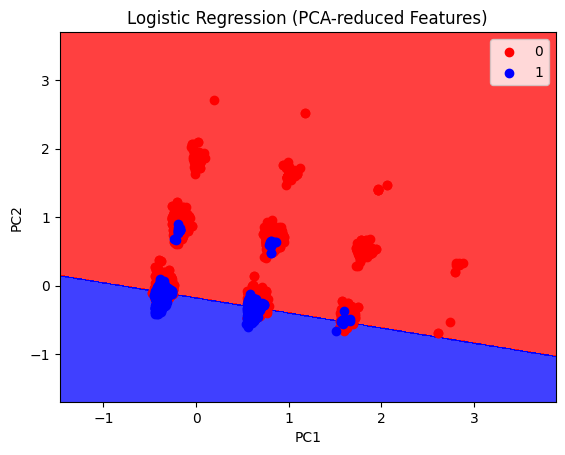

In [45]:
from sklearn.decomposition import PCA

# Reduce features to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train logistic regression again on reduced X
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)

LR = LogisticRegression()
LR.fit(X_train, y_train)

# Now plot decision boundary
from matplotlib.colors import ListedColormap

x_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)
)
plt.contourf(X1, X2, LR.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'blue'))(i), label=j)
plt.title('Logistic Regression (PCA-reduced Features)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


## Visualising the Test set results

C:\Users\HP\AppData\Local\Temp\ipykernel_18168\1570676393.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


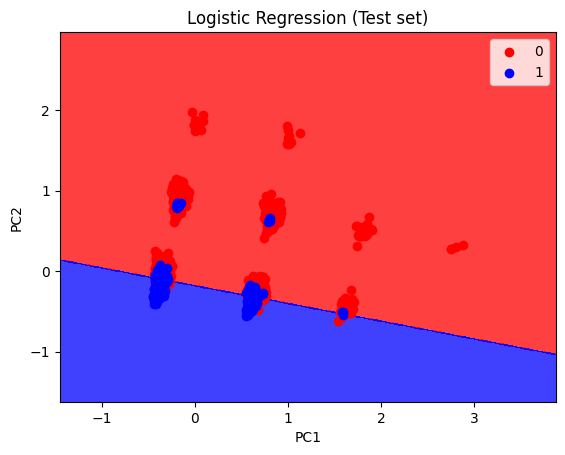

In [46]:
x_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)
)

plt.contourf(X1, X2, LR.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'blue'))(i), label=j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
